In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = {
    "Order_ID": range(1, 101),
    "Date": pd.date_range(start="2023-01-01", periods=100, freq="D"),
    "Region": np.random.choice(["North", "South", "East", "West"], 100),
    "Category": np.random.choice(["Electronics", "Clothing", "Furniture"], 100),
    "Product": np.random.choice(["Laptop", "Mobile", "Chair", "Table", "Shirt", "Headphones"], 100),
    "Sales": np.random.randint(100, 1000, 100),
    "Quantity": np.random.randint(1, 10, 100)
}

df = pd.DataFrame(data)
df.head()

,Order_ID,Date,Region,Category,Product,Sales,Quantity
0,1,2023-01-01,North,Clothing,Headphones,497,1
1,2,2023-01-02,East,Furniture,Shirt,249,1
2,3,2023-01-03,East,Electronics,Chair,494,4
3,4,2023-01-04,East,Furniture,Laptop,946,9
4,5,2023-01-05,West,Furniture,Chair,794,1


In [3]:
df.loc[5:10, "Sales"] = np.nan
df.loc[15:18, "Region"] = np.nan

In [4]:
# Fill missing values
df["Sales"].fillna(df["Sales"].mean(), inplace=True)
df["Region"].fillna(df["Region"].mode()[0], inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

df.isnull().sum()

/tmp/ipython-input-1829534792.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Sales"].fillna(df["Sales"].mean(), inplace=True)
/tmp/ipython-input-1829534792.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

,0
Order_ID,0
Date,0
Region,0
Category,0
Product,0
Sales,0
Quantity,0


In [5]:
df["Month"] = df["Date"].dt.month_name()
df.head()

,Order_ID,Date,Region,Category,Product,Sales,Quantity,Month
0,1,2023-01-01,North,Clothing,Headphones,497.0,1,January
1,2,2023-01-02,East,Furniture,Shirt,249.0,1,January
2,3,2023-01-03,East,Electronics,Chair,494.0,4,January
3,4,2023-01-04,East,Furniture,Laptop,946.0,9,January
4,5,2023-01-05,West,Furniture,Chair,794.0,1,January


In [6]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Order_ID  100 non-null    int64         
 1   Date      100 non-null    datetime64[ns]
 2   Region    100 non-null    object        
 3   Category  100 non-null    object        
 4   Product   100 non-null    object        
 5   Sales     100 non-null    float64       
 6   Quantity  100 non-null    int64         
 7   Month     100 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 6.4+ KB


,Order_ID,Date,Sales,Quantity
count,100.000000,100,100.000000,100.000000
mean,50.500000,2023-02-19 12:00:00,513.468085,5.180000
min,1.000000,2023-01-01 00:00:00,108.000000,1.000000
25%,25.750000,2023-01-25 18:00:00,287.000000,3.000000
50%,50.500000,2023-02-19 12:00:00,500.000000,5.000000
75%,75.250000,2023-03-16 06:00:00,704.500000,7.000000
max,100.000000,2023-04-10 00:00:00,999.000000,9.000000
std,29.011492,NaN,252.764741,2.618427


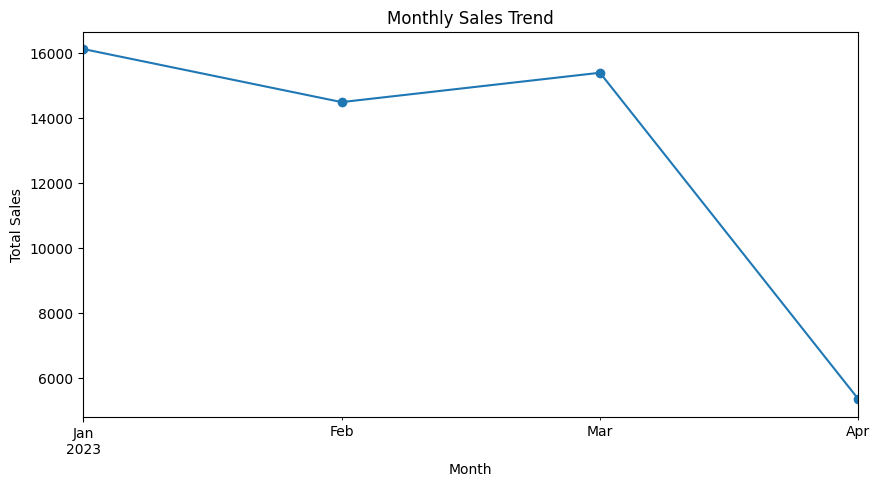

In [7]:
monthly_sales = df.groupby(df["Date"].dt.to_period("M"))["Sales"].sum()

plt.figure(figsize=(10,5))
monthly_sales.plot(kind="line", marker="o")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()

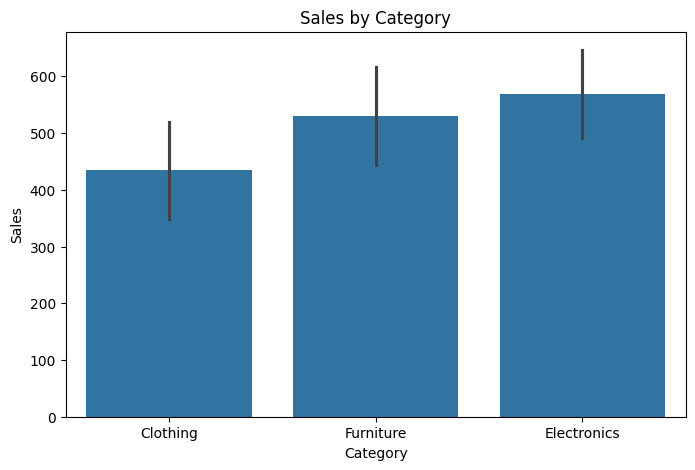

In [8]:
plt.figure(figsize=(8,5))
sns.barplot(x=df["Category"], y=df["Sales"])
plt.title("Sales by Category")
plt.show()

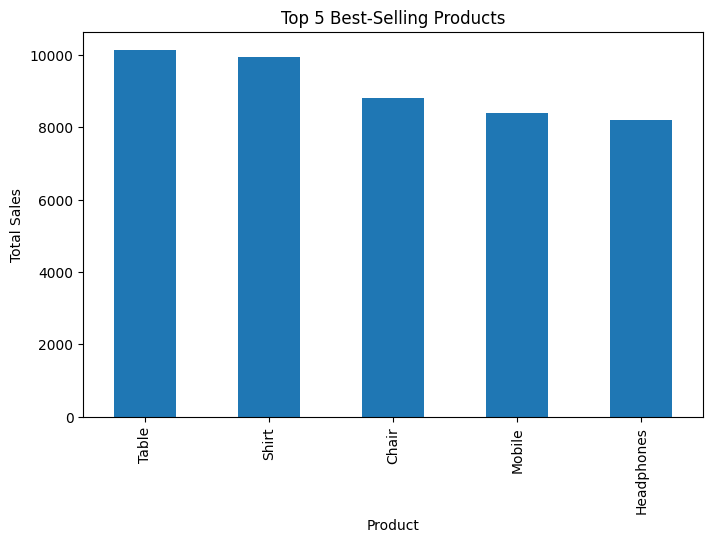

In [9]:
top_products = df.groupby("Product")["Sales"].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(8,5))
top_products.plot(kind="bar")
plt.title("Top 5 Best-Selling Products")
plt.xlabel("Product")
plt.ylabel("Total Sales")
plt.show()

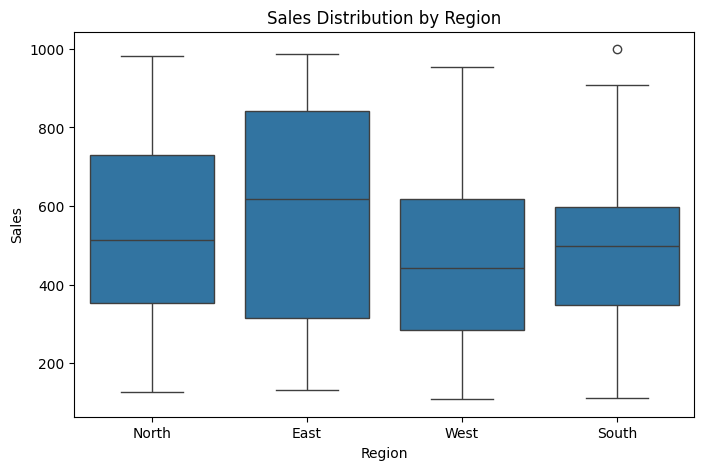

In [10]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Region", y="Sales", data=df)
plt.title("Sales Distribution by Region")
plt.show()

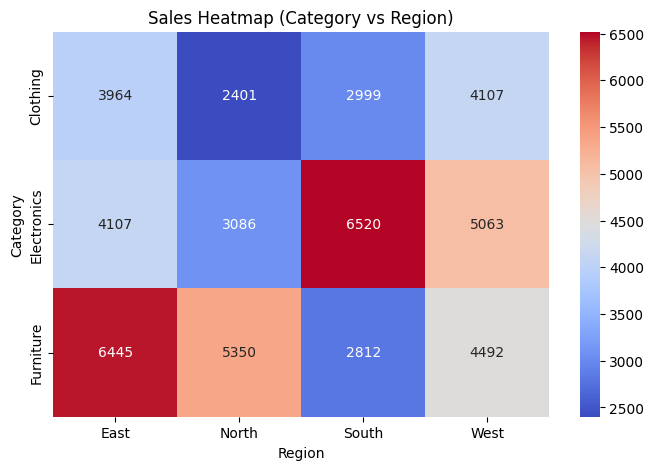

In [11]:
pivot_table = pd.pivot_table(df, values="Sales", index="Category", columns="Region", aggfunc="sum")

plt.figure(figsize=(8,5))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="coolwarm")
plt.title("Sales Heatmap (Category vs Region)")
plt.show()

In [12]:
print("Key Insights:")
print("- Identified monthly sales trends.")
print("- Found best-selling products.")
print("- Compared performance across regions.")
print("- Analyzed category-wise sales behavior.")
print("- Visualized key patterns using charts.")

Key Insights:
- Identified monthly sales trends.
- Found best-selling products.
- Compared performance across regions.
- Analyzed category-wise sales behavior.
- Visualized key patterns using charts.
